In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ofertas_relampago.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
df.shape

(48746, 13)

In [5]:
df['OFFER_START_DATE']= pd.to_datetime(df['OFFER_START_DATE'],format="%Y-%m-%d")
df['OFFER_START_DTTM']= pd.to_datetime(df['OFFER_START_DTTM'],format="%Y-%m-%d %H:%M:%S")
df['OFFER_FINISH_DTTM']= pd.to_datetime(df['OFFER_FINISH_DTTM'],format="%Y-%m-%d %H:%M:%S")

In [6]:
df['DURATION'] = ( df.OFFER_FINISH_DTTM - df.OFFER_START_DTTM ) / pd.Timedelta(hours=1)
df['DAY']=df.OFFER_START_DATE.dt.dayofweek.astype('str')
df['HOUR']=df.OFFER_START_DTTM.dt.hour

In [7]:
bin_cond = [-1, 6, 12, 18, 24]
bin_lab = ["0-6", "7-12", "13-18", "19-23"]
df["HOUR_CAT"] = pd.Categorical(pd.cut(df["HOUR"], bins=bin_cond, labels=bin_lab), categories=bin_lab)
df["PERC_SOLD"]= 1-(np.where(df.REMAINING_STOCK_AFTER_END<0,0,df.REMAINING_STOCK_AFTER_END)/df.INVOLVED_STOCK)

In [8]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DURATION,HOUR,PERC_SOLD
count,48746.000000,48746.000000,24579.000000,24579.000000,48746.000000,48746.000000,48746.000000
mean,35.007508,30.565216,51.208898,10.851052,5.708344,13.178722,0.201842
std,206.761058,195.813806,175.254414,45.475305,2.113096,4.511976,0.311411
min,1.000000,-192.000000,0.280000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,5.730000,1.000000,6.000000,7.000000,0.000000
50%,10.000000,8.000000,12.420000,3.000000,6.000556,13.000000,0.020000
75%,15.000000,15.000000,30.925000,6.000000,6.004444,19.000000,0.266667
max,9000.000000,8635.000000,4836.570000,1646.000000,104.752500,23.000000,1.000000


Puesto que en el _describe_ vemos que hay ofertas que no tuvieron duración, reviso los registros y decido quitar esos 1314 registros puesto que no tiene sentido analizarlas

In [9]:
df[df.DURATION==0].describe()
df = df[df.DURATION>0]

In [10]:
# Quitamos duplicados
df.drop_duplicates(inplace=True)
df['ID_OFFER']= 'ID'+str(range(0,df.shape[0]))
df.shape

(46549, 19)

### Hacemos entendimiento de las variables del dataset

In [11]:
df.OFFER_START_DATE.agg(['min','max'])

min   2021-06-01
max   2021-07-31
Name: OFFER_START_DATE, dtype: datetime64[ns]

In [12]:
df.OFFER_TYPE.value_counts(normalize=True, dropna=False)

lightning_deal    1.0
Name: OFFER_TYPE, dtype: float64

In [13]:
df.ORIGIN.value_counts(normalize=True, dropna=False)

NaN    0.771144
A      0.228856
Name: ORIGIN, dtype: float64

In [14]:
df.SHIPPING_PAYMENT_TYPE.value_counts(normalize=True, dropna=False)

free_shipping    0.542955
none             0.457045
Name: SHIPPING_PAYMENT_TYPE, dtype: float64

In [15]:
df.DOM_DOMAIN_AGG1.value_counts(normalize=True, dropna=False)

HOME&DECOR                      0.139681
APPAREL ACCESORIES              0.089454
APPAREL                         0.079894
COMPUTERS                       0.076887
SPORTS                          0.068573
PHARMACEUTICS                   0.063374
PERSONAL CARE                   0.061462
ELECTRONICS                     0.061312
MOBILE                          0.037316
AUTOPARTS                       0.035447
FOOTWEAR                        0.030914
TOOLS AND CONSTRUCTION          0.030570
TOYS AND GAMES                  0.028615
STATIONARY                      0.025672
INDUSTRY                        0.024383
BEAUTY EQUIPMENT                0.022707
FOODS                           0.017573
PERSONAL HYGIENE                0.017057
BABY                            0.016155
MOTOPARTS                       0.013298
BOOKS, MULTIMEDIA & OTHER E!    0.009753
PETS FOOD                       0.009388
PARTY                           0.008163
CLEANING                        0.007497
SECURITY        

In [16]:
df.VERTICAL.value_counts(normalize=True, dropna=False)

APP & SPORTS       0.272874
HOME & INDUSTRY    0.227051
CE                 0.175514
BEAUTY & HEALTH    0.147543
CPG                0.054738
ACC                0.053449
T & B              0.052933
ENTERTAINMENT      0.010247
OTHERS             0.005650
Name: VERTICAL, dtype: float64

In [17]:
df.DOMAIN_ID.value_counts(normalize=True, dropna=False)

MLM-SURGICAL_AND_INDUSTRIAL_MASKS    0.037122
MLM-HEADPHONES                       0.015876
MLM-LED_STRIPS                       0.010784
MLM-VEHICLE_LED_BULBS                0.009560
MLM-SNEAKERS                         0.009238
                                       ...   
MLM-CUTICLE_REMOVERS                 0.000021
MLM-HYDRAULIC_VEHICLE_JACKS          0.000021
MLM-BASKET_BALLS                     0.000021
MLM-STICKY_NOTES                     0.000021
MLM-ELECTRIC_SANDWICH_MAKERS         0.000021
Name: DOMAIN_ID, Length: 1255, dtype: float64

In [18]:
df.DAY.value_counts(normalize=True, dropna=False)

4    0.160111
5    0.153000
1    0.150143
3    0.149348
2    0.139101
0    0.129176
6    0.119122
Name: DAY, dtype: float64

In [19]:
df.HOUR_CAT.value_counts(normalize=True, dropna=False)

13-18    0.390814
7-12     0.338160
19-23    0.269372
0-6      0.001654
Name: HOUR_CAT, dtype: float64

### Hacemos los descriptivos

Se va a revisar la información de las ofertas relámpago del 1 de junio de 2021 al 31 de julio de 2021.

Miramos si en los 2 meses que estamos viendo, hay algún tipo de patrón respecto a la cantidad de ofertas por día.
Se pueden ver 3 caidas importantes en la cantidad de ofertas en la primera semana de junio, el día 30 del mismo mes y la tercera semana de julio. Sin embargo se tiene una tendencia creciente en la cantidad de ofertas.

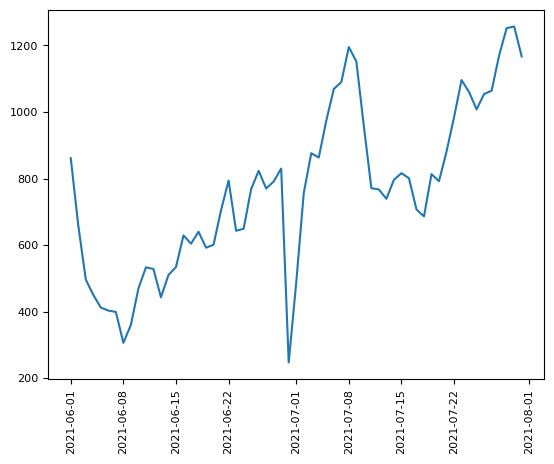

In [20]:
ofertas_por_dia = df.groupby('OFFER_START_DATE').OFFER_START_DTTM.count()
plt.rcParams['font.size'] = '8'
plt.xticks(rotation=90)
plt.plot(ofertas_por_dia)

#### Revisamos la mediana de la proporción del stock vendido por día y hora
Podemos ver que las ofertas hechas en la tarde tienen mayor porcentaje de venta del stock que las ofertas de la mañana y las hechas después de las 7pm son las que mayor porcentaje de stock vendido tienen. Respecto al día, la ofertas hechas el viernes y sábado, tienen menor proporción de stock vendido en las horas de la tarde. El miércoles, las ofertas hechas entre las 7am y 12m tienen mayor proporción de vendido comparado con los otros dias.

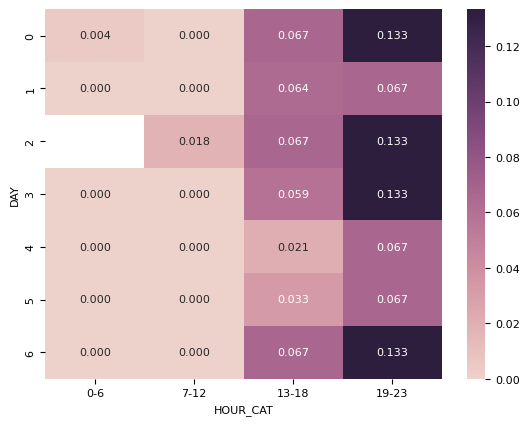

In [21]:
df_day_hour_cmpl = df.groupby(['DAY','HOUR_CAT']).PERC_SOLD.median().to_frame().reset_index().pivot(index='DAY',columns='HOUR_CAT',values='PERC_SOLD')
p1 = sns.heatmap(df_day_hour_cmpl, annot=True, fmt=".3f", cmap=sns.cubehelix_palette(as_cmap=True))

#### Diferencia entre el porcentaje de unidades vendidas  según la categoria de la vertical y el envío
Las ofertas con envío gratis tienen en general un porcentaje de unidades vendidas menor que las ofertas que no tienen esta caracteristica. Solamente en la categoria de _Entretainment_ el porcentaje de ventas es mayor un 2% en las que tienen el envío gratis. En el resto de categorias la diferencia esta alrededor del 9%

In [51]:
cat_envi_unit = df.groupby(['VERTICAL','SHIPPING_PAYMENT_TYPE']).PERC_SOLD.mean().to_frame()
cat_envi_unit.reset_index(level=1,inplace=True)
cat_envi_unit_cast = pd.pivot_table(cat_envi_unit, values='PERC_SOLD',index=cat_unit.index,columns=['SHIPPING_PAYMENT_TYPE'], aggfunc=np.sum)
cat_envi_unit_cast['DIFF_CANT']=(cat_envi_unit_cast.free_shipping-cat_envi_unit_cast.none)
cat_envi_unit_cast

SHIPPING_PAYMENT_TYPE,free_shipping,none,DIFF_CANT
VERTICAL,,,
ACC,0.165132,0.316611,-0.151480
APP & SPORTS,0.144787,0.256115,-0.111328
BEAUTY & HEALTH,0.219924,0.299762,-0.079838
CE,0.201662,0.286752,-0.085089
CPG,0.168199,0.233141,-0.064942
ENTERTAINMENT,0.144623,0.121708,0.022915
HOME & INDUSTRY,0.168389,0.239658,-0.071269
OTHERS,0.126280,0.205464,-0.079183
T & B,0.072791,0.171232,-0.098441


In [52]:
cat_envi_unit_cast[cat_envi_unit_cast.index!="ENTERTAINMENT"].DIFF_CANT.mean()

-0.09269629443586745

#### Respecto a la duración de la oferta y el hecho de tener o no envío gratis
Tenemos que no hay gran diferencia entre la duración media de las campañas de las diferentes categorias de la vertical sin importar si tienen o no envío gratis. Sin embargo,la categoria _App & Sports_ tuvo la oferta de mas larga duración durante el periodo que estamos analizando con 104 horas cuando lo máx de las otras categorias ha sido de 12 horas. Para categoria _Others_ la máx duración de sus ofertas ha sido de 8 horas

In [53]:
df.groupby(['VERTICAL','SHIPPING_PAYMENT_TYPE'])[['DURATION']].agg(["min","mean","median","max"])

DURATION                      \
                                            min      mean    median   
VERTICAL        SHIPPING_PAYMENT_TYPE                                 
ACC             free_shipping          0.000278  5.656637  6.000556   
                none                   0.000278  5.343480  6.000278   
APP & SPORTS    free_shipping          0.000278  6.012927  6.000833   
                none                   0.000278  5.750116  6.000556   
BEAUTY & HEALTH free_shipping          0.000278  5.740356  6.000556   
                none                   0.000278  5.667650  6.000556   
CE              free_shipping          0.000278  5.884216  6.000833   
                none                   0.000278  5.591801  6.000556   
CPG             free_shipping          0.000278  6.009640  6.000833   
                none                   0.000278  5.726638  6.000833   
ENTERTAINMENT   free_shipping          0.000278  6.323801  6.001111   
                none                   0.000278  5.760533  6.000556   
HOME & INDUSTRY free_shipping          0.000278  6.028843  6.000833   
                none                   0.000278  5.823707  6.000556   
OTHERS          free_shipping          0.000278  5.933800  6.000833   
                none                   0.000556  5.685038  6.000556   
T & B           free_shipping          0.000278  6.591076  6.002361   
                none                   0.000278  5.941638  6.000694   

                                                   
                                              max  
VERTICAL        SHIPPING_PAYMENT_TYPE              
ACC             free_shipping           12.039444  
                none                    12.039167  
APP & SPORTS    free_shipping           12.044167  
                none                   104.752500  
BEAUTY & HEALTH free_shipping           12.039444  
                none                    14.629722  
CE              free_shipping           15.619167  
                none                    12.040556  
CPG             free_shipping           14.668611  
                none                    12.040278  
ENTERTAINMENT   free_shipping           12.034167  
                none                     8.030000  
HOME & INDUSTRY free_shipping           12.044722  
                none                    12.040556  
OTHERS          free_shipping            8.688611  
                none                     8.000556  
T & B           free_shipping           12.040278  
                none                    12.034722

#### **Diferencia en la cantidad de unidades en una oferta que vendió todo vs otra que no**
En la siguiente tabla se puede ver que en todas las categorias la diferencia en la cantidad de unidades promedio entre una oferta que no vende todo vs una que si, es mayor al 20%.
La categorias de la _Vertical_ con mayor diferencia son _Beauty and health_,_T&B_ y _CE_. Por el contrario las categorias _Acc_ y _Entertainment_ mantienen una diferencia menor al 25%.
En promedio de las diferentes categorias de la _Vertical_ las campañas que cumplen vender el stock tiene un 48% menos unidades que las que no lo logran.

In [55]:
df['SOLD_TOTAL']=np.where(df.REMAINING_STOCK_AFTER_END<=0,'si','no')
cat_unit = df.groupby(['VERTICAL','SOLD_TOTAL']).INVOLVED_STOCK.mean().to_frame()
cat_unit.reset_index(level=1,inplace=True)
cat_unit_cast = pd.pivot_table(cat_unit, values='INVOLVED_STOCK',index=cat_unit.index,columns=['SOLD_TOTAL'], aggfunc=np.sum)
cat_unit_cast['DIFF_CANT']=(cat_unit_cast.si/cat_unit_cast.no)-1
cat_unit_cast

SOLD_TOTAL,no,si,DIFF_CANT
VERTICAL,,,
ACC,9.794342,7.536398,-0.230536
APP & SPORTS,18.900679,7.869848,-0.583621
BEAUTY & HEALTH,144.944969,26.171257,-0.819440
CE,26.497050,9.557191,-0.639311
CPG,15.485454,8.583673,-0.445694
ENTERTAINMENT,6.144105,4.789474,-0.220477
HOME & INDUSTRY,21.383855,10.146444,-0.525509
OTHERS,10.285714,7.454545,-0.275253
T & B,17.186762,6.065217,-0.647099


In [35]:
cat_unit_cast.DIFF_CANT.mean()

-0.4874377425709217

#### Revisamos la cantidad de unidades de las ofertas con envío gratis vs. las que no tienen esta caracteristica
En las categorias _Apps & sports_, _CE_, _Entertainment_ y _T & B_ las ofertas con envío gratis tienen en promedio mayor stock que aquellas que no. En la categoría de _Beauty and health_ las campañas con envío gratis tienden a tener un 80% menos de unidades que las ofertas que no, y en general tienen mayor cantidad de unidades comprometidas en las ofertas.

In [60]:
cat_unit_env = df.groupby(['VERTICAL','SHIPPING_PAYMENT_TYPE']).INVOLVED_STOCK.mean().to_frame()
cat_unit_env.reset_index(level=1,inplace=True)
cat_unit_env_cast = pd.pivot_table(cat_unit_env, values='INVOLVED_STOCK',index=cat_unit.index,columns=['SHIPPING_PAYMENT_TYPE'], aggfunc=np.sum)
cat_unit_env_cast['DIFF_CANT']=(cat_unit_env_cast.free_shipping/cat_unit_env_cast.none)-1
cat_unit_env_cast

SHIPPING_PAYMENT_TYPE,free_shipping,none,DIFF_CANT
VERTICAL,,,
ACC,8.562995,10.814377,-0.208184
APP & SPORTS,19.578312,16.111870,0.215148
BEAUTY & HEALTH,37.876440,196.799900,-0.807538
CE,28.858045,17.828341,0.618661
CPG,11.864086,17.108559,-0.306541
ENTERTAINMENT,6.609244,5.573222,0.185893
HOME & INDUSTRY,18.411201,22.518276,-0.182388
OTHERS,9.821429,10.778947,-0.088832
T & B,18.849815,12.796690,0.473023


#### Si revisamos la cantidad de dinero
En la siguien grafica se tiene la media y mediana de la cantidad de dinero correspondiente a las ofertas por día y hora, se puede ver en las ofertas hechas entre las 0horas y las 6 am son las que en promedio recogieron más dinero. Seguidas por las de las 7am a 6pm. Sin embargo, en el segundo grafico podemos ver la cantidad promedio de unidades por oferta, en las que podemos ver que las campañas entre las 7am y 6 pm tienden a tener mas unidades compromeditas, salvo por un caso atipico del lunes entre las 0-6, que puede deberse a un caso atípico de una oferta en especial. La cantidad de ofertas sin embargo se concentran las entre la 1pm y 6pm.

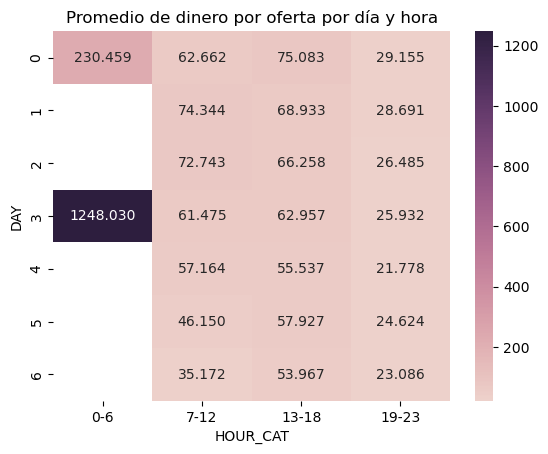

In [15]:
ax = plt.axes()
df_day_hour_pl_cmpl = df.groupby(['DAY','HOUR_CAT']).SOLD_AMOUNT.mean().to_frame().reset_index().pivot(index='DAY',columns='HOUR_CAT',values='SOLD_AMOUNT')
p1 = sns.heatmap(df_day_hour_pl_cmpl, annot=True, fmt=".3f", cmap=sns.cubehelix_palette(as_cmap=True), ax = ax)
ax.set_title('Promedio de dinero por oferta por día y hora')
plt.show()

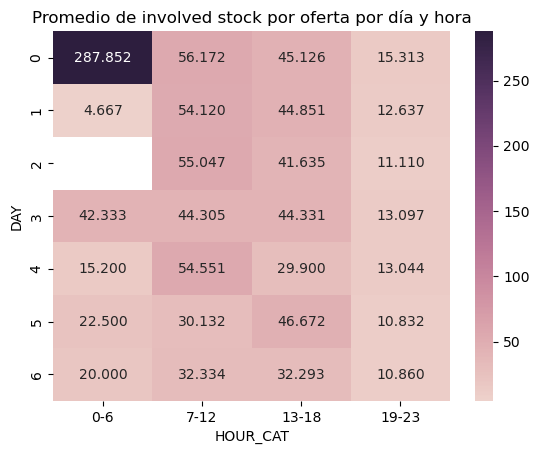

In [13]:
ax = plt.axes()
df_day_hour_cnt_cmpl = df.groupby(['DAY','HOUR_CAT']).INVOLVED_STOCK.mean().to_frame().reset_index().pivot(index='DAY',columns='HOUR_CAT',values='INVOLVED_STOCK')
p1 = sns.heatmap(df_day_hour_cnt_cmpl, annot=True, fmt=".3f", cmap=sns.cubehelix_palette(as_cmap=True), ax = ax)
ax.set_title('Promedio de involved stock por oferta por día y hora')
plt.show()

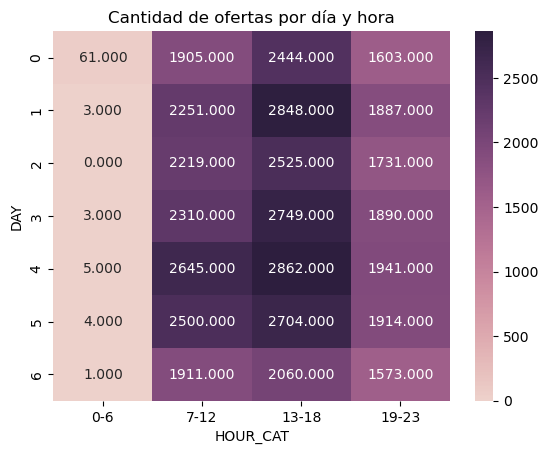

In [14]:
ax = plt.axes()
df_day_hour_cnts_cmpl = df.groupby(['DAY','HOUR_CAT']).OFFER_START_DTTM.count().to_frame().reset_index().pivot(index='DAY',columns='HOUR_CAT',values='OFFER_START_DTTM')
p1 = sns.heatmap(df_day_hour_cnts_cmpl, annot=True, fmt=".3f", cmap=sns.cubehelix_palette(as_cmap=True),ax = ax)
ax.set_title('Cantidad de ofertas por día y hora')
plt.show()

### Si revisamos dia a dia la cantidad de ofertas por categoria
Podemos ver que no han habido cambios en el periodo de observación, respecto a las categorias con más ofertas, que como lo veiamos antes son _Apps & sports_,_Beauty and Health_ y _CE_. Sin embargo, del 5 al 9 de julio las ofertas de _T & B_ fueron más de las que normalmente se reporta de esa categoria.

In [36]:
cant_vert_dia = df.groupby(['OFFER_START_DATE','VERTICAL']).OFFER_START_DATE.count().to_frame()
cant_vert_dia.reset_index(level=1,inplace=True)
cant_vert_dia = pd.pivot_table(cant_vert_dia, values='OFFER_START_DATE',index=cant_vert_dia.index,columns=['VERTICAL'], aggfunc=np.sum)

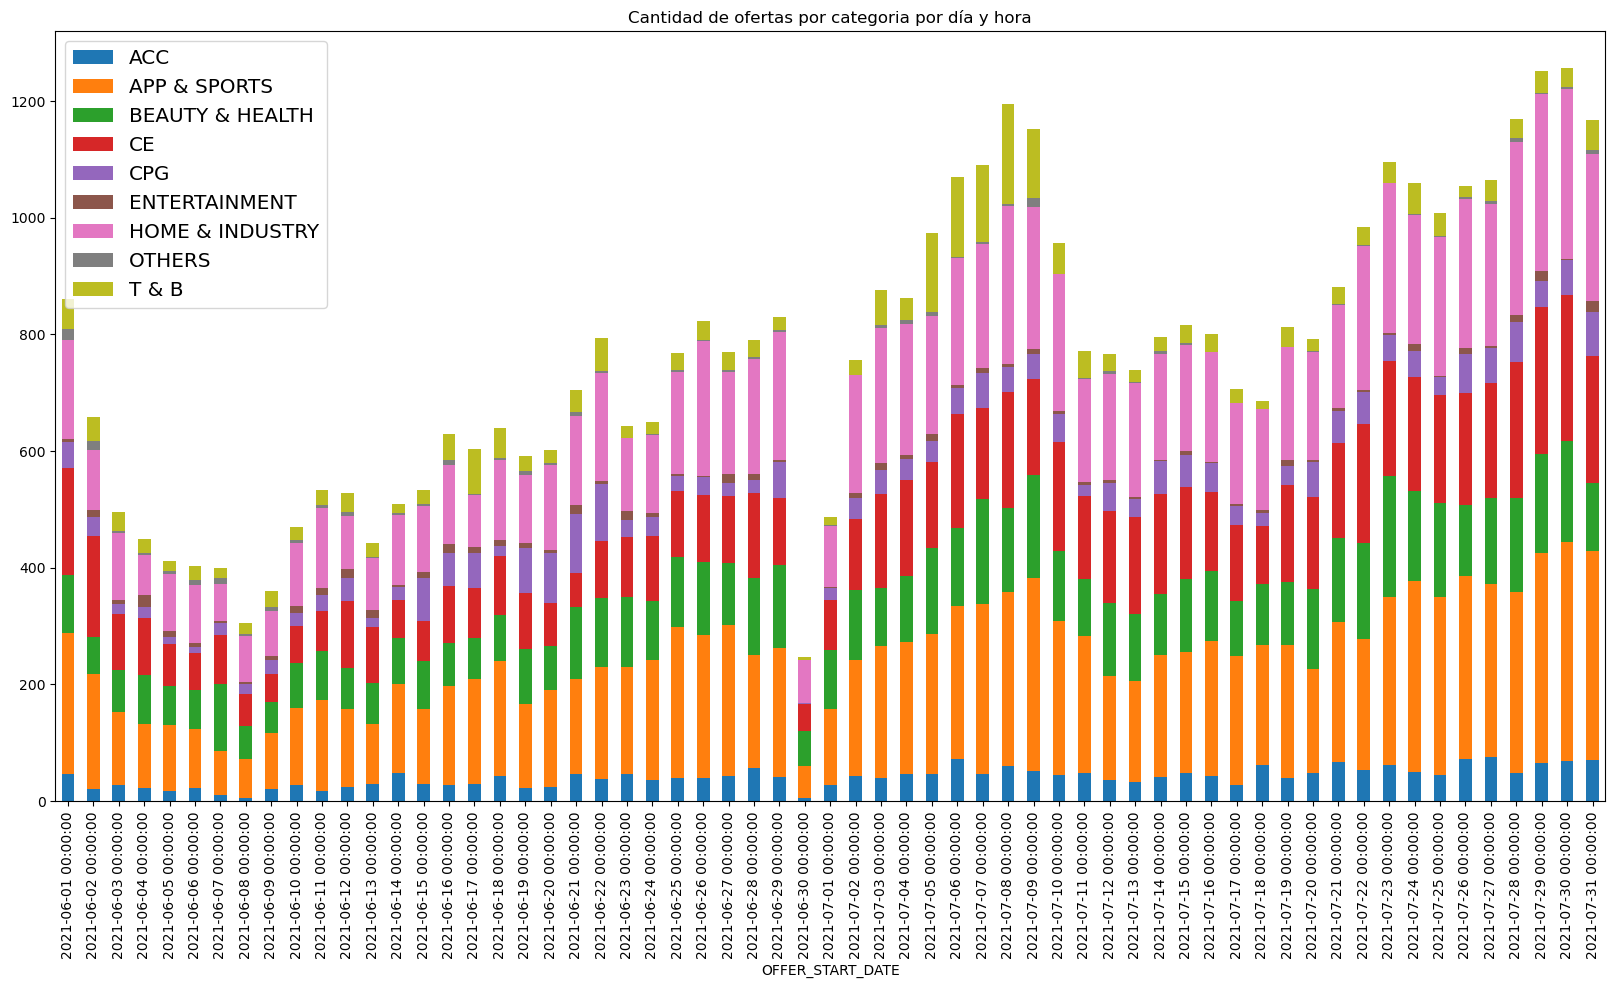

In [49]:
ax = plt.axes()
cant_vert_dia.plot(kind='bar', stacked=True,figsize=(20,10),ax = ax)
ax.set_title('Cantidad de ofertas por categoria por día y hora')
ax.legend(fontsize='x-large')